# Benford  for Python

### Current version: 0.1.0.3

# Installation

### As of Dec 2017, Benford for python is a Package in PyPi, so you can install with *pip*:
### $ pip install benford_py

### Or you can cd into the site-packages subfolder of your python distribution (or environment) and clone from there:
### $ git clone http://github.com/milcent/Benford_py.git.

# Demo

### This demo assumes you have (at least) some familiarity with Benford's Law.

### First let's import some libraries and the benford module.

In [8]:
%matplotlib inline

import numpy as np
import pandas as pd
#import pandas_datareader.data as web # Not a dependency, but we'll need it now.

In [9]:
import benford as bf

### Quick start

#### Getting some public data, the S&P500 EFT quotes, up until Dec 2016

In [10]:
sp = pd.read_csv('data/SPY.csv', index_col='Date', parse_dates=True)

#### Creating simple and log return  columns

In [11]:
#adding '_' to facilitate handling the column
#sp.rename(columns={'Adj Close':'Adj_Close'}, inplace=True) 
sp['p_r'] = sp.Close/sp.Close.shift()-1        #simple returns
sp['l_r'] = np.log(sp.Close/sp.Close.shift())  #log returns
sp.tail()

,Open,High,Low,Close,Volume,Adj Close,p_r,l_r
Date,,,,,,,,
2016-12-23,225.429993,225.720001,225.210007,225.710007,36251400,225.710007,0.001464,0.001463
2016-12-27,226.020004,226.729996,226.000000,226.270004,41054400,226.270004,0.002481,0.002478
2016-12-28,226.570007,226.589996,224.270004,224.399994,59776300,224.399994,-0.008265,-0.008299
2016-12-29,224.479996,224.889999,223.839996,224.350006,47719500,224.350006,-0.000223,-0.000223
2016-12-30,224.729996,224.830002,222.729996,223.529999,101301800,223.529999,-0.003655,-0.003662


### First Digits Test

### Let us see if the SPY log retunrs conform to Benford's Law 

Initialized sequence with 5968 registries.

Test performed on 5968 registries.
Discarded 0 records < 1 after preparation.


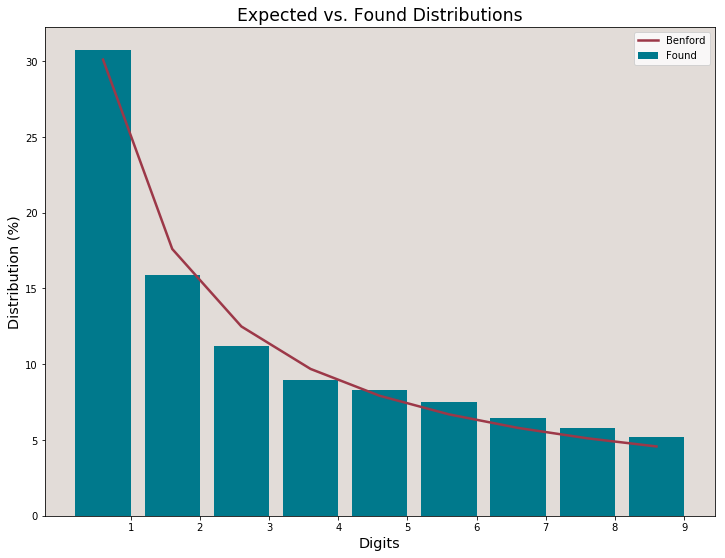

In [12]:
f1d = bf.first_digits(sp.l_r, digs=1, decimals=8) # digs=1 for the first digit (1-9)

### The *first_digits* function draws the plot (default) with bars fot the digits found frequencies and a line corresponding to the expected Benford proportions. 

### It also returns a DataFrame object with Counts, Found proportions and Expected values for each digit in the data studied.

In [13]:
print(f1d)

             Counts     Found  Expected
First_1_Dig                            
1              1835  0.307473  0.301030
2               949  0.159015  0.176091
3               668  0.111930  0.124939
4               534  0.089477  0.096910
5               494  0.082775  0.079181
6               447  0.074899  0.066947
7               386  0.064678  0.057992
8               345  0.057808  0.051153
9               310  0.051944  0.045757


### First Two Digists

Initialized sequence with 5968 registries.

Test performed on 5968 registries.
Discarded 0 records < 10 after preparation.


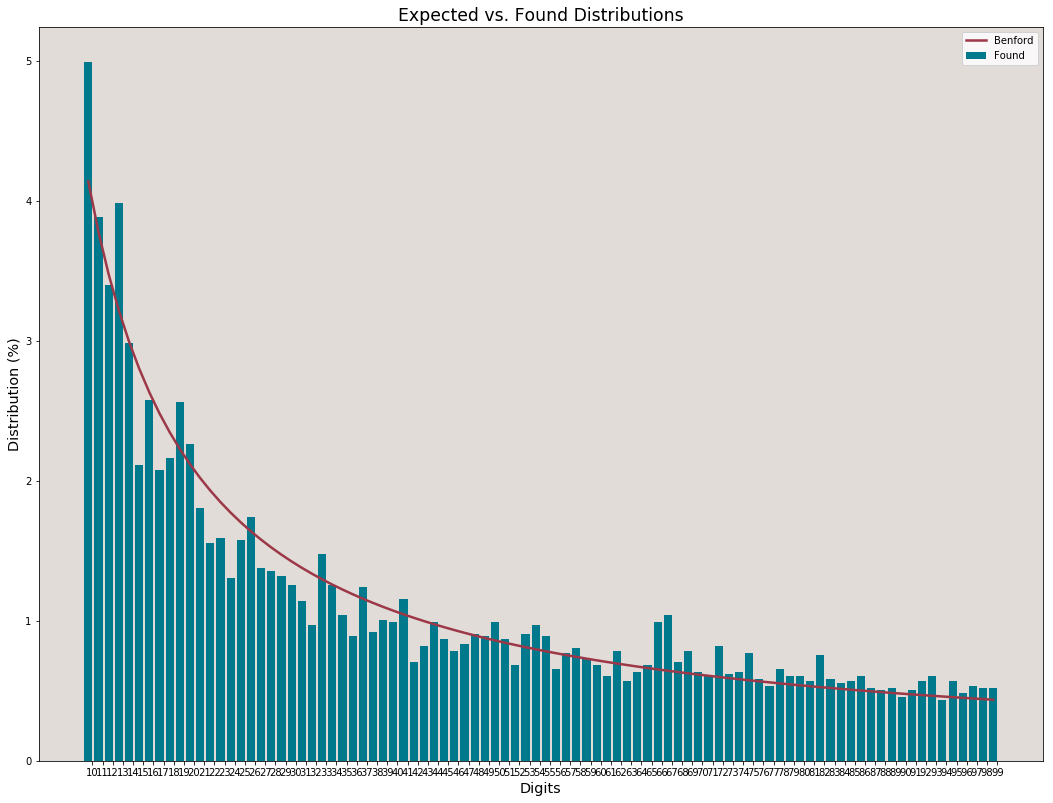

In [14]:
f2d = bf.first_digits(sp.l_r, digs=2, decimals=8) # Note the parameter digs=2!

In [15]:
f2d.head()

,Counts,Found,Expected
First_2_Dig,,,
10,298,0.049933,0.041393
11,232,0.038874,0.037789
12,203,0.034015,0.034762
13,238,0.039879,0.032185
14,178,0.029826,0.029963


In [16]:
f2d.tail()

,Counts,Found,Expected
First_2_Dig,,,
95,34,0.005697,0.004548
96,29,0.004859,0.004501
97,32,0.005362,0.004454
98,31,0.005194,0.004409
99,31,0.005194,0.004365


## Assessing conformity

### There are some tests to more precisely evaluate if the data studied is a good fit to Benford's Law.

### The first we'll use is the Z statistic for the proportions.
### In the digits functions, you can turn it on by settign the parameter *confidence*, which will tell the function which confidence level to consider after calculating the Z score for each proportion.

Initialized sequence with 5968 registries.

Test performed on 5968 registries.
Discarded 0 records < 10 after preparation.

The entries with the significant positive deviations are:

             Expected     Found   Z_score
First_2_Dig                              
67           0.006434  0.010389  3.740056
13           0.032185  0.039879  3.331418
10           0.041393  0.049933  3.279619
66           0.006531  0.009886  3.137524
82           0.005264  0.007540  2.340301
72           0.005990  0.008210  2.138736


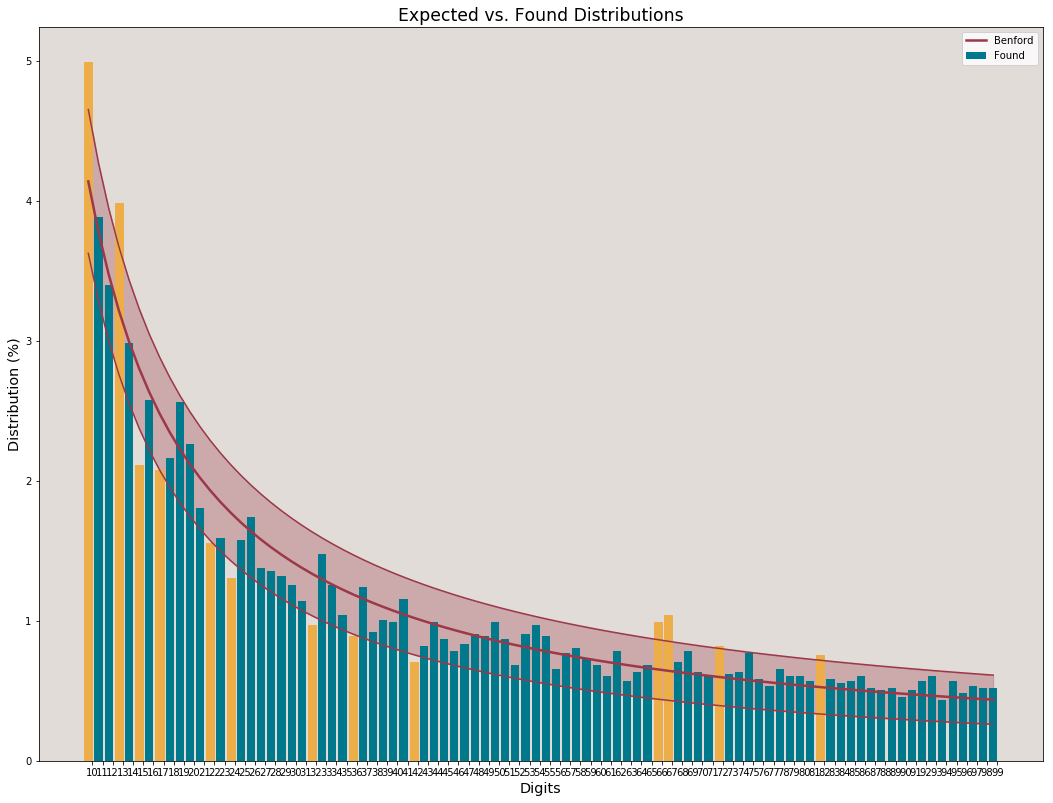

In [17]:
# For a significance of 5%, a confidence of 95
f2d = bf.first_digits(sp.l_r, digs=2, decimals=8, confidence=95)

### Some things happened:
### <li>It printed a DataFrame wiith the significant positive deviations, in descending order of the Z score.</li>
### <li>In the plot, to the Benford Expected line, it added upper and lower boundaries, based on the level of confidence by the parameter. Accordingly, it changed the colors of the bars whose proportions fell lower or higher than the drawn boundaries, for better vizualisation.</li>
### The *confidence* parameter takes the follwoing values other than *None*: 80, 85, 90, 95, 99 99.9, 99.99, 99.999, 99.9999 and 99.99999.

### Other tests

### We can do all this with the *First Three Digits*, *Second Digit* and the *Last Two Digits* tests too.

Initialized sequence with 5968 registries.

Test performed on 5968 registries.
Discarded 0 records < 100 after preparation.

The entries with the significant positive deviations are:

             Expected     Found   Z_score
First_3_Dig                              
952          0.000456  0.001676  4.110387
962          0.000451  0.001508  3.539604
997          0.000435  0.001340  3.041483
823          0.000527  0.001508  3.017908
695          0.000624  0.001676  2.991625
945          0.000459  0.001340  2.874850
139          0.003113  0.005194  2.769750
751          0.000578  0.001508  2.720614
874          0.000497  0.001340  2.635545
862          0.000504  0.001340  2.593616


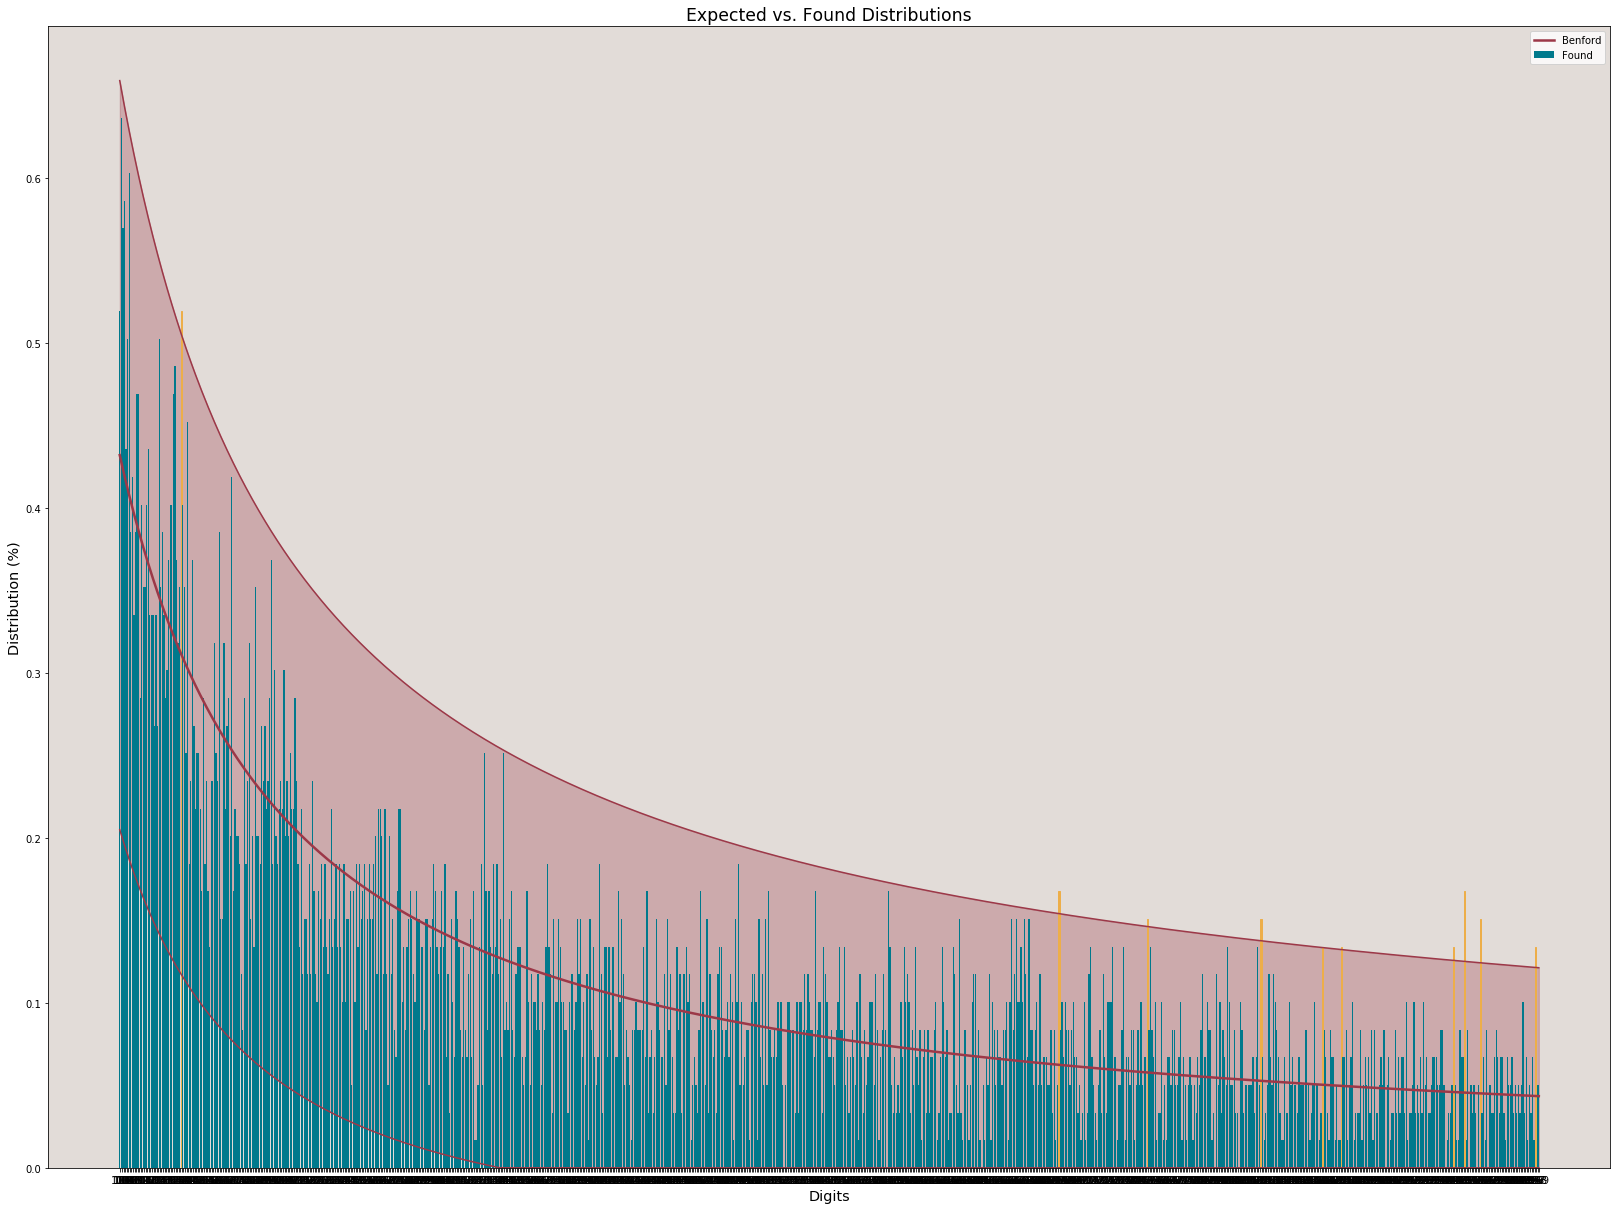

In [18]:
# First Three Digits Test, now with 99% confidence level
# digs=3 for the first three digits
f3d = bf.first_digits(sp.l_r, digs=3, decimals=8, confidence=99)

In [19]:
# The First Three Digits plot is better seen and zoomed in and out without the inline plotting.
# Try %matplotlib

### There are also the Second Digit test, and Last Two Digits test, as shown bellow.

Initialized sequence with 5968 registries.

Test performed on 5968 registries.
Discarded 0 records < 10 after preparation.

The entries with the significant positive deviations are:

         Expected     Found   Z_score
Sec_Dig                              
0        0.119679  0.128686  2.123777


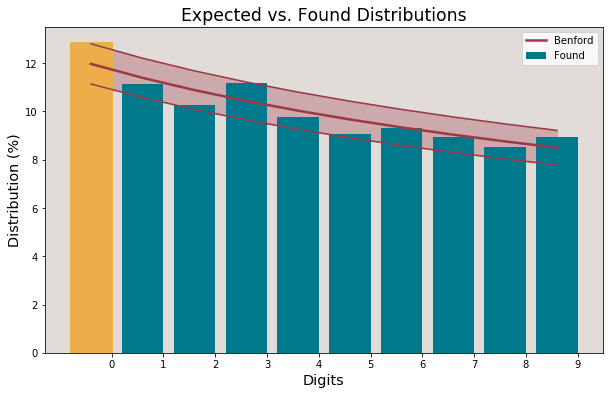

In [20]:
# Second Digit Test
sd = bf.second_digit(sp.l_r, decimals=8, confidence=95)

Initialized sequence with 5968 registries.

Test performed on 5968 registries.
Discarded 0 records < 1000 after preparation

The entries with the significant positive deviations are:

            Expected     Found   Z_score
Last_2_Dig                              
2           0.010101  0.013070  2.228792
99          0.010101  0.012902  2.099340
85          0.010101  0.012399  1.710985


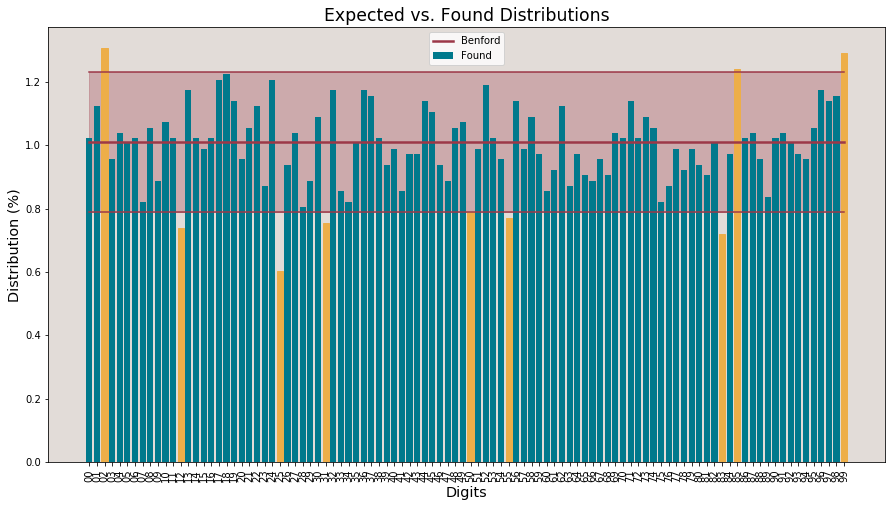

In [21]:
# Last Two Digits Test
l2d = bf.last_two_digits(sp.l_r, decimals=8, confidence=90)

### Other Important Parameters

### <li>*digs*: only used in the First Digits function, to tell it which test to run: 1- First Digits; 2- Fist Two Digits; and 3- First Three Digits.</li>
### <li>*decimals*: informs the number of decimal places to consider. Defaluts to 2, for currencies, but I set it to 8 here, since we are dealing with log returns (long floats). If the sequence is of integers, set it to 0. You may also set it to *infer* if you don't know exactly or if the data has registries with different number of decimal places, and it will treat every registry separately.</li>
### <li>*sign*: tells which portion of the data to consider. *pos*: only the positive entries; *neg*: only the negative ones; *all*: all entries but zeros. Defaults to *all*.</li>
### <li>*inform*: gives information about the test during its run, like the number of registries analysed, the number of registries discarded according to each test (ie, < 10 for the First Digits), and shows the top Z scores of the resulting DataFrame if *confidence* is not None.</li>
### <li>*high_Z*: chooses which Z scores to be used when displaying results, according to the confidence level chosen. Defaluts to *pos*, which will return only values higher than the expexted frequencies; *neg* will return only values lower than the expexted frequencies; *all* will return both extremes (positive and negative); and an integer will return the first n entries, positive and negative, regardless of whether Z is higher than the confidence or not.</li>
### <li>*limit_N*: sets a limit to the sample size for the calculation of the Z scores. This may be found useful if the sample is too big, due to the Z test power problem. Defaults to None.</li>
### <li>*show_plot*: draws the test plot. Defaults to True. Note that if *confidence* is not None, the plot will highlight the bars outside the lower and upper boundaries, regardless of the *high_Z* value.</li>
### <li>*MAD* and *MSE*: calculate, respectively, the Mean Absolute Deviation and the Mean Squared Error of the sample, for each test. Defaults to False. Both can be used inside the tests' functions or separetely, in their own functions, mad and mse.</li>

## MAD

### The Mean Absolute Deviation, or MAD, is, as the name states, the average of all absolute deviations between the found proportions and the Benford's expected ones. 
### <a href=www.sciencedirect.com/science/article/pii/S0748575100000087>Drake and Nigrini (2000)</a> developed this model, later revised by <a href=www.wiley.com/WileyCDA/WileyTitle/productCd-0470890460.html>Nigrini (2001)</a>, using empirical data to set limits of conformity for the First, First Two, First Three and Second Digits tests.
### The MAD averages the proportions, so it is not directly influenced by the sample size. The lower the MAD, the better the confotmity.

In [22]:
mad1 = bf.mad(sp.l_r, test=1, decimals=8) # test=1 : MAD for the First Digits
mad1

0.008337279258069716

### Note that you must choose the *test* parameter, since there is one MAD for each test.
### <li>First Digit: *1* or *'F1D'*;</li>
### <li>First Two Digits: *2* or *'F2D'*;</li>
### <li>First Three Digits: *3* or *'F3D'*;</li>
### <li>Second Digit: *22* or *'SD'*;</li>
### <li>Last Two Digits: *-2* or *'L2D'*;     *# pithonic*</li>

In [23]:
mad2 = bf.mad(sp.l_r, test=2, decimals=8) # test=2 : MAD for the First Two Digits
mad2

0.001432048977662544

In [24]:
mad3 = bf.mad(sp.l_r, test=3, decimals=8) # test=3 : MAD for the First Three Digits
mad3

0.0003407180755952727

In [25]:
mad_sd = bf.mad(sp.l_r, test=22, decimals=8) # test=22 : MAD for the Second Digits
mad_sd

0.0041505064502393345

In [26]:
mad_l2d = bf.mad(sp.l_r, test=-2, decimals=8) # test=-2 : MAD for the Last Two Digits
mad_l2d

0.0009972039429143992

### Or you can set the *MAD* parameter to *True* when running the tests functions, and it will also give the corresponding conformity limits (as long as *inform* is also True).

In [27]:
f2d = bf.first_digits(sp.l_r, digs=2, decimals=8, MAD=True, show_plot=False)

Initialized sequence with 5968 registries.

Test performed on 5968 registries.
Discarded 0 records < 10 after preparation.

The Mean Absolute Deviation is 0.001432048977662544
For the First Two Digits:
            - 0.0000 to 0.0012: Close Conformity
            - 0.0012 to 0.0018: Acceptable Conformity
            - 0.0018 to 0.0022: Marginally Acceptable Conformity
            - Above 0.0022: Nonconformity


In [28]:
sd = bf.second_digit(sp.l_r, decimals=8, MAD=True, show_plot=False)

Initialized sequence with 5968 registries.

Test performed on 5968 registries.
Discarded 0 records < 10 after preparation.

The Mean Absolute Deviation is 0.0041505064502393345
For the Second Digits:
            - 0.0000 to 0.008: Close Conformity
            - 0.008 to 0.01: Acceptable Conformity
            - 0.01 to 0.012: Marginally Acceptable Conformity
            - Above 0.012: Nonconformity


## Mantissas

### The mantissa is the decimal part of a logarithm. In a Benford data set, the mantissas of the registries' logs are uniformly distributed, such that when ordered,they should form a straight line in the interval [0,1), with slope 1/N, N being the sample size..

The Mantissas MEAN is 0.4920578105867651. 		Ref: 0.5.
The Mantissas VARIANCE is 0.08979262768798181. 	Ref: 0.083333.
The Mantissas SKEWNESS is 0.05133280166873715. 	Ref: 0.
The Mantissas KURTOSIS is -1.2807116798784601. 	Ref: -1.2.


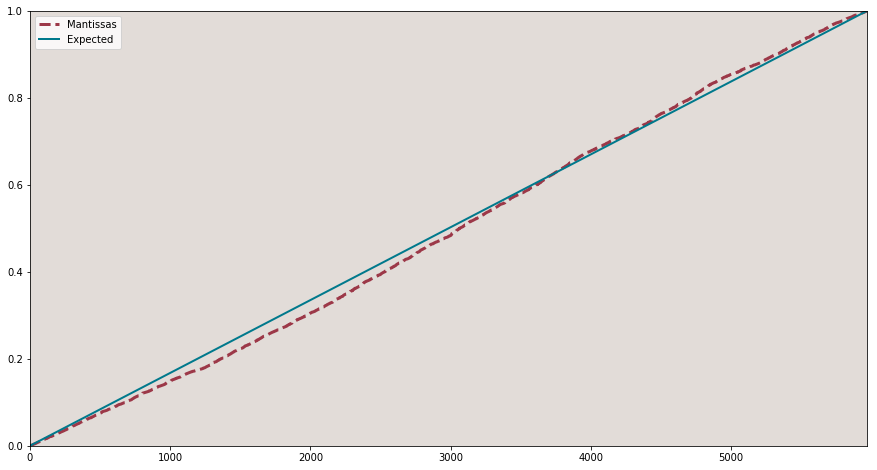

In [29]:
mant = bf.mantissas(sp.l_r, inform=True, show_plot=True)

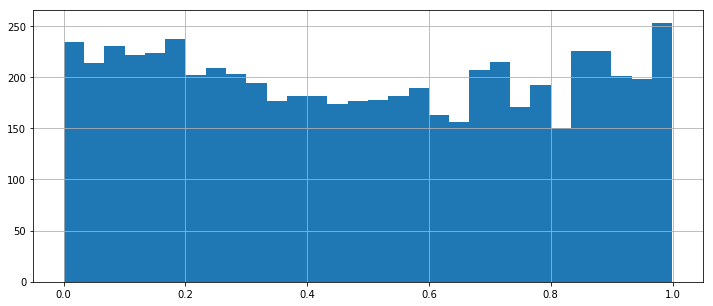

In [30]:
mant.hist(bins=30, figsize=(12,5))

### That's it for now.
### If you have a data set that you think would be nice to study with Benford tests, share it and we can post a notebook with all tests and comments.
### Thanks
### Milcent